In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import os
os.getcwd()

'/home/arkaprabham/Desktop/1'

In [2]:
data= pd.read_csv("data.csv")

In [3]:
data['text'][1717]

'cricketUpdated: Aug 25, 2019 16:49 ISTNathan Lyon added another accolade to his already illustrious career as the Australia spinner surpassed Dennis Lillee to become the 3rd most successful wicket-taker for his country in the longest format of the sport.\nLyon achieved the feat when he dismissed Joe Root on Day 4 of the third Ashes Test match against England in Headingley on Sunday.\nRoot went down the pitch to the off-spinner’s third ball of the day and tried to work it legside.\nJoe Root added just two to his overnight score before he was dismissed for 77 to bolster Australia’s chances of completing an Ashes-clinching win.\nAnother sun-drenched day in Leeds saw England resume on 156-3, with Root 75 not out and Stokes two not out after facing 50 balls on Saturday.'

In [4]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,Dhara Singh/CNET\n\nTwelve miles from the hust...,2297
1,BBC\n\nDoctor Who will be streaming exclusivel...,170
2,Roland Quandt\n\nThe headphone jack on phones ...,192
3,Geoffrey Morrison/CNET\n\nIf autonomous sensor...,206
4,Sarah Tew/CNET\n\nAdobe Fresco makes me wish I...,595


In [5]:
##Descriptive statistics of word counts
data.word_count.describe()

count    2306.000000
mean      493.392888
std       441.666237
min         3.000000
25%       255.000000
50%       356.000000
75%       570.000000
max      3841.000000
Name: word_count, dtype: float64

In [6]:
#Identify common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:5]
freq

the    57848
to     29840
and    27249
a      26270
of     25040
dtype: int64

In [7]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data
         ['text']).split()).value_counts()[-10:]
freq1

https://t.co/EKfHhGIhUa    1
Talks                      1
bicycle,                   1
Ruffalo)                   1
"jog                       1
Bull,                      1
U-verse,                   1
okay,”                     1
$760                       1
knows?”                    1
dtype: int64

In [8]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [9]:
corpus = []
for i in range(0, len(data['text'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [10]:
corpus

['dhara singh cnet twelve mile hustle bustle time square lie brooklyn neighborhood brownsville part york tourist ever see gone flashing light high tech billboard crossroad world instead story sleek building stand stark contrast bare industrial street surrounding district building york councilwoman alicka amprey samuel say experiencing issue altice optimum internet service past four year rain say service stop complaint internet service provider changed status quo city country conversation next best thing conversation always get something even half way decent said people even grocery store people amprey samuel suffering connection woe across greater brownsville ocean hill community represents brownsville alone resident say rely public wi fi free cheaper use connectivity option according recent report brooklyn public library even broadband like ampry samuel service often spotty hype g next generation mobile technology promise high speed time faster current g tech mask reality million amer

In [12]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(background_color='pink',stopwords=stop_words,max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

ValueError: source code string cannot contain null bytes

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [14]:
list(cv.vocabulary_.keys())[:10]

['singh',
 'cnet',
 'mile',
 'time',
 'square',
 'lie',
 'brooklyn',
 'neighborhood',
 'part',
 'york']

In [15]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [16]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'said'),
 Text(0, 0, 'year'),
 Text(0, 0, 'first'),
 Text(0, 0, 'like'),
 Text(0, 0, 'time'),
 Text(0, 0, 'company'),
 Text(0, 0, 'get'),
 Text(0, 0, 'cnet'),
 Text(0, 0, 'aug'),
 Text(0, 0, 'people'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'make'),
 Text(0, 0, 'would'),
 Text(0, 0, 'day'),
 Text(0, 0, 'ist'),
 Text(0, 0, 'may'),
 Text(0, 0, 'watch'),
 Text(0, 0, 'say'),
 Text(0, 0, 'service')]

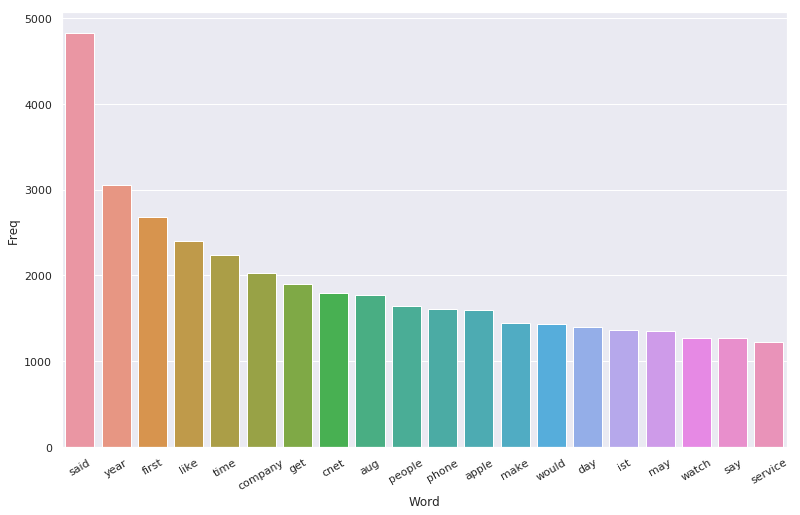

In [17]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0                aug ist  1310
1          published aug   745
2        first published   727
3            updated aug   666
4          playing watch   586
5                yes yes   445
6              last year   366
7          enlarge image   354
8              sarah tew   307
9            twitter com   305
10           pic twitter   304
11              tew cnet   302
12  originally published   279
13              year old   258
14           getty image   253
15         social medium   221
16                 wi fi   220
17           galaxy note   217
18           apple watch   212
19               may get   201


[Text(0, 0, 'aug ist'),
 Text(0, 0, 'published aug'),
 Text(0, 0, 'first published'),
 Text(0, 0, 'updated aug'),
 Text(0, 0, 'playing watch'),
 Text(0, 0, 'yes yes'),
 Text(0, 0, 'last year'),
 Text(0, 0, 'enlarge image'),
 Text(0, 0, 'sarah tew'),
 Text(0, 0, 'twitter com'),
 Text(0, 0, 'pic twitter'),
 Text(0, 0, 'tew cnet'),
 Text(0, 0, 'originally published'),
 Text(0, 0, 'year old'),
 Text(0, 0, 'getty image'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'wi fi'),
 Text(0, 0, 'galaxy note'),
 Text(0, 0, 'apple watch'),
 Text(0, 0, 'may get')]

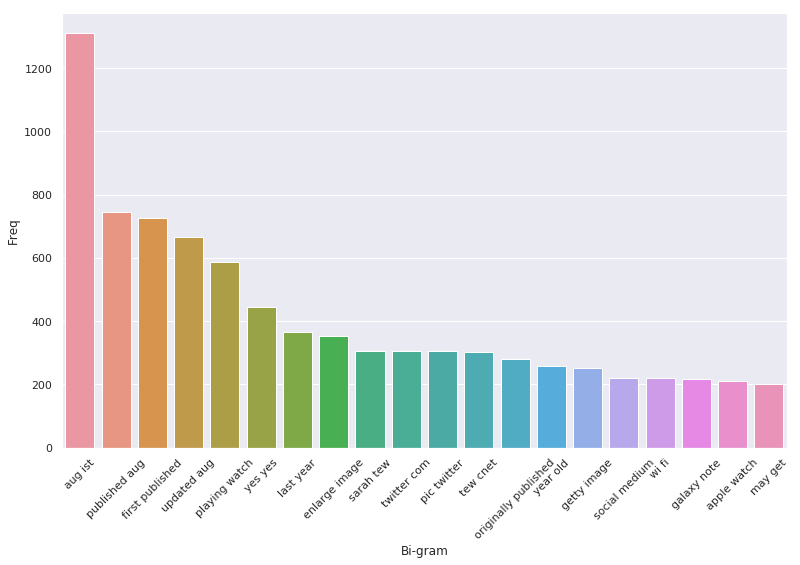

In [18]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0           first published aug   661
1               updated aug ist   655
2             published aug ist   655
3               pic twitter com   304
4                sarah tew cnet   302
5                   yes yes yes   299
6              angela lang cnet   190
7                  cnet may get   182
8       respond request comment   144
9                 may get share   138
10            get share revenue   138
11    originally published july   125
12  immediately respond request   120
13            india updated aug   115
14            chris monroe cnet   113
15                note cnet may   108
16           share revenue sale   106
17         revenue sale product   102
18        sale product featured    98
19        product featured page    96


[Text(0, 0, 'first published aug'),
 Text(0, 0, 'updated aug ist'),
 Text(0, 0, 'published aug ist'),
 Text(0, 0, 'pic twitter com'),
 Text(0, 0, 'sarah tew cnet'),
 Text(0, 0, 'yes yes yes'),
 Text(0, 0, 'angela lang cnet'),
 Text(0, 0, 'cnet may get'),
 Text(0, 0, 'respond request comment'),
 Text(0, 0, 'may get share'),
 Text(0, 0, 'get share revenue'),
 Text(0, 0, 'originally published july'),
 Text(0, 0, 'immediately respond request'),
 Text(0, 0, 'india updated aug'),
 Text(0, 0, 'chris monroe cnet'),
 Text(0, 0, 'note cnet may'),
 Text(0, 0, 'share revenue sale'),
 Text(0, 0, 'revenue sale product'),
 Text(0, 0, 'sale product featured'),
 Text(0, 0, 'product featured page')]

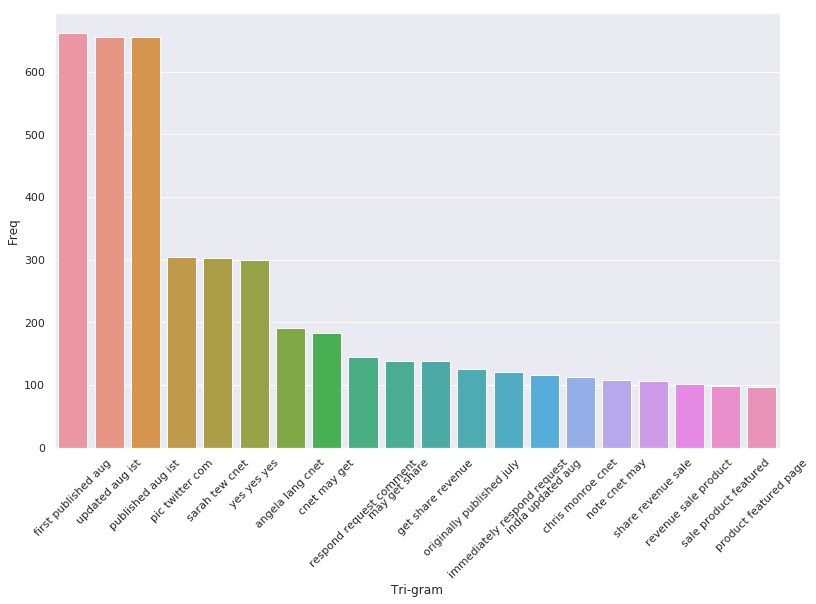

In [19]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [21]:
tf_idf_vector.shape

(1, 10000)

In [22]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


In [23]:
sorted_items=sort_coo(tf_idf_vector.tocoo())
#sort the tf-idf vectors by descending order of scoressorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
roland quandt headphone jack phone good run like good thing eventually must end end seems finally arrived samsung upcoming galaxy note line last holdout trend ditching headphone jack appears samsung going note line leaked image shared thursday roland quandt sammobile seems pretty clear samsung planning mm headphone jack usb c dongle note plus dongle look like well headphone adapter different apple make iphones google make pixel signal end era showing samsung may indeed planning move without port going forward unclear samsung include dongle box like google charge separately like apple answer well samsung heavily rumored leaked next flagship likely need wait samsung unpacked event aug samsung immediately respond request comment

Keywords:
samsung 0.483
dongle 0.309
headphone 0.29
headphone jack 0.24
jack 0.204
leaked 0.161
note 0.141
planning 0.14
end 0.127
like 0.12
seems 0.12
google 0.103
going forward 0.1
line 0.1
apple 0.1
samsung unpacked 0.099
like good 0.098
mm headphon

In [24]:
data.iloc[2,4]

"['samsungs', 'jack', 'dongle', 'samsung', 'roland', 'makes', 'headphone', 'planning', 'end', 'hints', 'note', 'galaxy', 'leaked']"

In [25]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [26]:
xtrain_count =  count_vect.transform(corpus)
print(xtrain_count)

  (0, 93)	2
  (0, 100)	1
  (0, 133)	3
  (0, 196)	15
  (0, 232)	4
  (0, 250)	1
  (0, 317)	3
  (0, 319)	2
  (0, 387)	3
  (0, 389)	1
  (0, 399)	2
  (0, 439)	1
  (0, 441)	1
  (0, 470)	1
  (0, 491)	1
  (0, 499)	2
  (0, 511)	1
  (0, 563)	1
  (0, 584)	2
  (0, 585)	1
  (0, 586)	3
  (0, 639)	1
  (0, 715)	2
  (0, 906)	1
  (0, 908)	3
  :	:
  (2305, 30455)	1
  (2305, 30491)	3
  (2305, 30578)	2
  (2305, 30690)	1
  (2305, 30818)	1
  (2305, 31130)	1
  (2305, 31730)	2
  (2305, 31750)	5
  (2305, 31815)	1
  (2305, 32027)	6
  (2305, 32236)	8
  (2305, 32388)	2
  (2305, 32401)	3
  (2305, 32447)	3
  (2305, 33742)	1
  (2305, 34022)	1
  (2305, 34557)	1
  (2305, 34585)	1
  (2305, 35223)	1
  (2305, 35476)	3
  (2305, 35502)	1
  (2305, 35655)	1
  (2305, 35673)	2
  (2305, 35704)	4
  (2305, 36100)	3


In [27]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string


In [28]:
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()
topic_word.shape

(20, 36244)

In [29]:
n_top_words = 20
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [30]:
topic_summaries

['test run wicket kohli read england coffee batsman indie ball west stokes wireless australia second water headphone rahane first virat',
 'car vehicle engine model enlarge corvette electric wheel automaker image ford speed standard driver v liter motor rear trim seat',
 'film actor bollywood kapoor crore htshowbiz saaho shared prabhas hindi deepika action telugu akshay kabir kumar upcoming sara singh tamil',
 'therapy redskin pain cbd examination junior cannabis thc massage ssc mtv walking gruden ivey dead locast sc pbm elliott percussive',
 'case ed chidambaram punjab ranveer mehta plea wyze kapil chandigarh bail bcci inx singh sibal bench august vb ultraviolet anticipatory',
 'bihar mc church mishra catholic neymar vatican jagannath panchkula substation yadav amin caste jitu psg keshari priest gopal saif hazaribag',
 'series match point first team test india aug world would time three year like star read win ist see game',
 'kashmir pakistan jammu recall jaitley shah bjp issue terri

# Fuzzy seq similarity using Levenstein

In [34]:
from fuzzywuzzy import fuzz

In [35]:
fuzz.ratio("computer lab", "computer lab")

100

In [36]:
label_topics=np.zeros((len(corpus),20))
for i in range(len(corpus)):
    for j in range(20):
        print(i,j)
        label_topics[i,j]=fuzz.ratio(corpus[i],topic_summaries[j])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

76 8
76 9
76 10
76 11
76 12
76 13
76 14
76 15
76 16
76 17
76 18
76 19
77 0
77 1
77 2
77 3
77 4
77 5
77 6
77 7
77 8
77 9
77 10
77 11
77 12
77 13
77 14
77 15
77 16
77 17
77 18
77 19
78 0
78 1
78 2
78 3
78 4
78 5
78 6
78 7
78 8
78 9
78 10
78 11
78 12
78 13
78 14
78 15
78 16
78 17
78 18
78 19
79 0
79 1
79 2
79 3
79 4
79 5
79 6
79 7
79 8
79 9
79 10
79 11
79 12
79 13
79 14
79 15
79 16
79 17
79 18
79 19
80 0
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
80 11
80 12
80 13
80 14
80 15
80 16
80 17
80 18
80 19
81 0
81 1
81 2
81 3
81 4
81 5
81 6
81 7
81 8
81 9
81 10
81 11
81 12
81 13
81 14
81 15
81 16
81 17
81 18
81 19
82 0
82 1
82 2
82 3
82 4
82 5
82 6
82 7
82 8
82 9
82 10
82 11
82 12
82 13
82 14
82 15
82 16
82 17
82 18
82 19
83 0
83 1
83 2
83 3
83 4
83 5
83 6
83 7
83 8
83 9
83 10
83 11
83 12
83 13
83 14
83 15
83 16
83 17
83 18
83 19
84 0
84 1
84 2
84 3
84 4
84 5
84 6
84 7
84 8
84 9
84 10
84 11
84 12
84 13
84 14
84 15
84 16
84 17
84 18
84 19
85 0
85 1
85 2
85 3
85 4
85 5
85 6
85 7
85 8
85 9


143 6
143 7
143 8
143 9
143 10
143 11
143 12
143 13
143 14
143 15
143 16
143 17
143 18
143 19
144 0
144 1
144 2
144 3
144 4
144 5
144 6
144 7
144 8
144 9
144 10
144 11
144 12
144 13
144 14
144 15
144 16
144 17
144 18
144 19
145 0
145 1
145 2
145 3
145 4
145 5
145 6
145 7
145 8
145 9
145 10
145 11
145 12
145 13
145 14
145 15
145 16
145 17
145 18
145 19
146 0
146 1
146 2
146 3
146 4
146 5
146 6
146 7
146 8
146 9
146 10
146 11
146 12
146 13
146 14
146 15
146 16
146 17
146 18
146 19
147 0
147 1
147 2
147 3
147 4
147 5
147 6
147 7
147 8
147 9
147 10
147 11
147 12
147 13
147 14
147 15
147 16
147 17
147 18
147 19
148 0
148 1
148 2
148 3
148 4
148 5
148 6
148 7
148 8
148 9
148 10
148 11
148 12
148 13
148 14
148 15
148 16
148 17
148 18
148 19
149 0
149 1
149 2
149 3
149 4
149 5
149 6
149 7
149 8
149 9
149 10
149 11
149 12
149 13
149 14
149 15
149 16
149 17
149 18
149 19
150 0
150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
150 10
150 11
150 12
150 13
150 14
150 15
150 16
150 17
150 18
150

207 5
207 6
207 7
207 8
207 9
207 10
207 11
207 12
207 13
207 14
207 15
207 16
207 17
207 18
207 19
208 0
208 1
208 2
208 3
208 4
208 5
208 6
208 7
208 8
208 9
208 10
208 11
208 12
208 13
208 14
208 15
208 16
208 17
208 18
208 19
209 0
209 1
209 2
209 3
209 4
209 5
209 6
209 7
209 8
209 9
209 10
209 11
209 12
209 13
209 14
209 15
209 16
209 17
209 18
209 19
210 0
210 1
210 2
210 3
210 4
210 5
210 6
210 7
210 8
210 9
210 10
210 11
210 12
210 13
210 14
210 15
210 16
210 17
210 18
210 19
211 0
211 1
211 2
211 3
211 4
211 5
211 6
211 7
211 8
211 9
211 10
211 11
211 12
211 13
211 14
211 15
211 16
211 17
211 18
211 19
212 0
212 1
212 2
212 3
212 4
212 5
212 6
212 7
212 8
212 9
212 10
212 11
212 12
212 13
212 14
212 15
212 16
212 17
212 18
212 19
213 0
213 1
213 2
213 3
213 4
213 5
213 6
213 7
213 8
213 9
213 10
213 11
213 12
213 13
213 14
213 15
213 16
213 17
213 18
213 19
214 0
214 1
214 2
214 3
214 4
214 5
214 6
214 7
214 8
214 9
214 10
214 11
214 12
214 13
214 14
214 15
214 16
214 17
214 

270 12
270 13
270 14
270 15
270 16
270 17
270 18
270 19
271 0
271 1
271 2
271 3
271 4
271 5
271 6
271 7
271 8
271 9
271 10
271 11
271 12
271 13
271 14
271 15
271 16
271 17
271 18
271 19
272 0
272 1
272 2
272 3
272 4
272 5
272 6
272 7
272 8
272 9
272 10
272 11
272 12
272 13
272 14
272 15
272 16
272 17
272 18
272 19
273 0
273 1
273 2
273 3
273 4
273 5
273 6
273 7
273 8
273 9
273 10
273 11
273 12
273 13
273 14
273 15
273 16
273 17
273 18
273 19
274 0
274 1
274 2
274 3
274 4
274 5
274 6
274 7
274 8
274 9
274 10
274 11
274 12
274 13
274 14
274 15
274 16
274 17
274 18
274 19
275 0
275 1
275 2
275 3
275 4
275 5
275 6
275 7
275 8
275 9
275 10
275 11
275 12
275 13
275 14
275 15
275 16
275 17
275 18
275 19
276 0
276 1
276 2
276 3
276 4
276 5
276 6
276 7
276 8
276 9
276 10
276 11
276 12
276 13
276 14
276 15
276 16
276 17
276 18
276 19
277 0
277 1
277 2
277 3
277 4
277 5
277 6
277 7
277 8
277 9
277 10
277 11
277 12
277 13
277 14
277 15
277 16
277 17
277 18
277 19
278 0
278 1
278 2
278 3
278 4
278 

333 15
333 16
333 17
333 18
333 19
334 0
334 1
334 2
334 3
334 4
334 5
334 6
334 7
334 8
334 9
334 10
334 11
334 12
334 13
334 14
334 15
334 16
334 17
334 18
334 19
335 0
335 1
335 2
335 3
335 4
335 5
335 6
335 7
335 8
335 9
335 10
335 11
335 12
335 13
335 14
335 15
335 16
335 17
335 18
335 19
336 0
336 1
336 2
336 3
336 4
336 5
336 6
336 7
336 8
336 9
336 10
336 11
336 12
336 13
336 14
336 15
336 16
336 17
336 18
336 19
337 0
337 1
337 2
337 3
337 4
337 5
337 6
337 7
337 8
337 9
337 10
337 11
337 12
337 13
337 14
337 15
337 16
337 17
337 18
337 19
338 0
338 1
338 2
338 3
338 4
338 5
338 6
338 7
338 8
338 9
338 10
338 11
338 12
338 13
338 14
338 15
338 16
338 17
338 18
338 19
339 0
339 1
339 2
339 3
339 4
339 5
339 6
339 7
339 8
339 9
339 10
339 11
339 12
339 13
339 14
339 15
339 16
339 17
339 18
339 19
340 0
340 1
340 2
340 3
340 4
340 5
340 6
340 7
340 8
340 9
340 10
340 11
340 12
340 13
340 14
340 15
340 16
340 17
340 18
340 19
341 0
341 1
341 2
341 3
341 4
341 5
341 6
341 7
341 8
3

397 15
397 16
397 17
397 18
397 19
398 0
398 1
398 2
398 3
398 4
398 5
398 6
398 7
398 8
398 9
398 10
398 11
398 12
398 13
398 14
398 15
398 16
398 17
398 18
398 19
399 0
399 1
399 2
399 3
399 4
399 5
399 6
399 7
399 8
399 9
399 10
399 11
399 12
399 13
399 14
399 15
399 16
399 17
399 18
399 19
400 0
400 1
400 2
400 3
400 4
400 5
400 6
400 7
400 8
400 9
400 10
400 11
400 12
400 13
400 14
400 15
400 16
400 17
400 18
400 19
401 0
401 1
401 2
401 3
401 4
401 5
401 6
401 7
401 8
401 9
401 10
401 11
401 12
401 13
401 14
401 15
401 16
401 17
401 18
401 19
402 0
402 1
402 2
402 3
402 4
402 5
402 6
402 7
402 8
402 9
402 10
402 11
402 12
402 13
402 14
402 15
402 16
402 17
402 18
402 19
403 0
403 1
403 2
403 3
403 4
403 5
403 6
403 7
403 8
403 9
403 10
403 11
403 12
403 13
403 14
403 15
403 16
403 17
403 18
403 19
404 0
404 1
404 2
404 3
404 4
404 5
404 6
404 7
404 8
404 9
404 10
404 11
404 12
404 13
404 14
404 15
404 16
404 17
404 18
404 19
405 0
405 1
405 2
405 3
405 4
405 5
405 6
405 7
405 8
4

461 3
461 4
461 5
461 6
461 7
461 8
461 9
461 10
461 11
461 12
461 13
461 14
461 15
461 16
461 17
461 18
461 19
462 0
462 1
462 2
462 3
462 4
462 5
462 6
462 7
462 8
462 9
462 10
462 11
462 12
462 13
462 14
462 15
462 16
462 17
462 18
462 19
463 0
463 1
463 2
463 3
463 4
463 5
463 6
463 7
463 8
463 9
463 10
463 11
463 12
463 13
463 14
463 15
463 16
463 17
463 18
463 19
464 0
464 1
464 2
464 3
464 4
464 5
464 6
464 7
464 8
464 9
464 10
464 11
464 12
464 13
464 14
464 15
464 16
464 17
464 18
464 19
465 0
465 1
465 2
465 3
465 4
465 5
465 6
465 7
465 8
465 9
465 10
465 11
465 12
465 13
465 14
465 15
465 16
465 17
465 18
465 19
466 0
466 1
466 2
466 3
466 4
466 5
466 6
466 7
466 8
466 9
466 10
466 11
466 12
466 13
466 14
466 15
466 16
466 17
466 18
466 19
467 0
467 1
467 2
467 3
467 4
467 5
467 6
467 7
467 8
467 9
467 10
467 11
467 12
467 13
467 14
467 15
467 16
467 17
467 18
467 19
468 0
468 1
468 2
468 3
468 4
468 5
468 6
468 7
468 8
468 9
468 10
468 11
468 12
468 13
468 14
468 15
468 16

524 9
524 10
524 11
524 12
524 13
524 14
524 15
524 16
524 17
524 18
524 19
525 0
525 1
525 2
525 3
525 4
525 5
525 6
525 7
525 8
525 9
525 10
525 11
525 12
525 13
525 14
525 15
525 16
525 17
525 18
525 19
526 0
526 1
526 2
526 3
526 4
526 5
526 6
526 7
526 8
526 9
526 10
526 11
526 12
526 13
526 14
526 15
526 16
526 17
526 18
526 19
527 0
527 1
527 2
527 3
527 4
527 5
527 6
527 7
527 8
527 9
527 10
527 11
527 12
527 13
527 14
527 15
527 16
527 17
527 18
527 19
528 0
528 1
528 2
528 3
528 4
528 5
528 6
528 7
528 8
528 9
528 10
528 11
528 12
528 13
528 14
528 15
528 16
528 17
528 18
528 19
529 0
529 1
529 2
529 3
529 4
529 5
529 6
529 7
529 8
529 9
529 10
529 11
529 12
529 13
529 14
529 15
529 16
529 17
529 18
529 19
530 0
530 1
530 2
530 3
530 4
530 5
530 6
530 7
530 8
530 9
530 10
530 11
530 12
530 13
530 14
530 15
530 16
530 17
530 18
530 19
531 0
531 1
531 2
531 3
531 4
531 5
531 6
531 7
531 8
531 9
531 10
531 11
531 12
531 13
531 14
531 15
531 16
531 17
531 18
531 19
532 0
532 1
53

587 17
587 18
587 19
588 0
588 1
588 2
588 3
588 4
588 5
588 6
588 7
588 8
588 9
588 10
588 11
588 12
588 13
588 14
588 15
588 16
588 17
588 18
588 19
589 0
589 1
589 2
589 3
589 4
589 5
589 6
589 7
589 8
589 9
589 10
589 11
589 12
589 13
589 14
589 15
589 16
589 17
589 18
589 19
590 0
590 1
590 2
590 3
590 4
590 5
590 6
590 7
590 8
590 9
590 10
590 11
590 12
590 13
590 14
590 15
590 16
590 17
590 18
590 19
591 0
591 1
591 2
591 3
591 4
591 5
591 6
591 7
591 8
591 9
591 10
591 11
591 12
591 13
591 14
591 15
591 16
591 17
591 18
591 19
592 0
592 1
592 2
592 3
592 4
592 5
592 6
592 7
592 8
592 9
592 10
592 11
592 12
592 13
592 14
592 15
592 16
592 17
592 18
592 19
593 0
593 1
593 2
593 3
593 4
593 5
593 6
593 7
593 8
593 9
593 10
593 11
593 12
593 13
593 14
593 15
593 16
593 17
593 18
593 19
594 0
594 1
594 2
594 3
594 4
594 5
594 6
594 7
594 8
594 9
594 10
594 11
594 12
594 13
594 14
594 15
594 16
594 17
594 18
594 19
595 0
595 1
595 2
595 3
595 4
595 5
595 6
595 7
595 8
595 9
595 10
59

651 6
651 7
651 8
651 9
651 10
651 11
651 12
651 13
651 14
651 15
651 16
651 17
651 18
651 19
652 0
652 1
652 2
652 3
652 4
652 5
652 6
652 7
652 8
652 9
652 10
652 11
652 12
652 13
652 14
652 15
652 16
652 17
652 18
652 19
653 0
653 1
653 2
653 3
653 4
653 5
653 6
653 7
653 8
653 9
653 10
653 11
653 12
653 13
653 14
653 15
653 16
653 17
653 18
653 19
654 0
654 1
654 2
654 3
654 4
654 5
654 6
654 7
654 8
654 9
654 10
654 11
654 12
654 13
654 14
654 15
654 16
654 17
654 18
654 19
655 0
655 1
655 2
655 3
655 4
655 5
655 6
655 7
655 8
655 9
655 10
655 11
655 12
655 13
655 14
655 15
655 16
655 17
655 18
655 19
656 0
656 1
656 2
656 3
656 4
656 5
656 6
656 7
656 8
656 9
656 10
656 11
656 12
656 13
656 14
656 15
656 16
656 17
656 18
656 19
657 0
657 1
657 2
657 3
657 4
657 5
657 6
657 7
657 8
657 9
657 10
657 11
657 12
657 13
657 14
657 15
657 16
657 17
657 18
657 19
658 0
658 1
658 2
658 3
658 4
658 5
658 6
658 7
658 8
658 9
658 10
658 11
658 12
658 13
658 14
658 15
658 16
658 17
658 18
658

714 7
714 8
714 9
714 10
714 11
714 12
714 13
714 14
714 15
714 16
714 17
714 18
714 19
715 0
715 1
715 2
715 3
715 4
715 5
715 6
715 7
715 8
715 9
715 10
715 11
715 12
715 13
715 14
715 15
715 16
715 17
715 18
715 19
716 0
716 1
716 2
716 3
716 4
716 5
716 6
716 7
716 8
716 9
716 10
716 11
716 12
716 13
716 14
716 15
716 16
716 17
716 18
716 19
717 0
717 1
717 2
717 3
717 4
717 5
717 6
717 7
717 8
717 9
717 10
717 11
717 12
717 13
717 14
717 15
717 16
717 17
717 18
717 19
718 0
718 1
718 2
718 3
718 4
718 5
718 6
718 7
718 8
718 9
718 10
718 11
718 12
718 13
718 14
718 15
718 16
718 17
718 18
718 19
719 0
719 1
719 2
719 3
719 4
719 5
719 6
719 7
719 8
719 9
719 10
719 11
719 12
719 13
719 14
719 15
719 16
719 17
719 18
719 19
720 0
720 1
720 2
720 3
720 4
720 5
720 6
720 7
720 8
720 9
720 10
720 11
720 12
720 13
720 14
720 15
720 16
720 17
720 18
720 19
721 0
721 1
721 2
721 3
721 4
721 5
721 6
721 7
721 8
721 9
721 10
721 11
721 12
721 13
721 14
721 15
721 16
721 17
721 18
721 19
72

777 11
777 12
777 13
777 14
777 15
777 16
777 17
777 18
777 19
778 0
778 1
778 2
778 3
778 4
778 5
778 6
778 7
778 8
778 9
778 10
778 11
778 12
778 13
778 14
778 15
778 16
778 17
778 18
778 19
779 0
779 1
779 2
779 3
779 4
779 5
779 6
779 7
779 8
779 9
779 10
779 11
779 12
779 13
779 14
779 15
779 16
779 17
779 18
779 19
780 0
780 1
780 2
780 3
780 4
780 5
780 6
780 7
780 8
780 9
780 10
780 11
780 12
780 13
780 14
780 15
780 16
780 17
780 18
780 19
781 0
781 1
781 2
781 3
781 4
781 5
781 6
781 7
781 8
781 9
781 10
781 11
781 12
781 13
781 14
781 15
781 16
781 17
781 18
781 19
782 0
782 1
782 2
782 3
782 4
782 5
782 6
782 7
782 8
782 9
782 10
782 11
782 12
782 13
782 14
782 15
782 16
782 17
782 18
782 19
783 0
783 1
783 2
783 3
783 4
783 5
783 6
783 7
783 8
783 9
783 10
783 11
783 12
783 13
783 14
783 15
783 16
783 17
783 18
783 19
784 0
784 1
784 2
784 3
784 4
784 5
784 6
784 7
784 8
784 9
784 10
784 11
784 12
784 13
784 14
784 15
784 16
784 17
784 18
784 19
785 0
785 1
785 2
785 3
785

841 7
841 8
841 9
841 10
841 11
841 12
841 13
841 14
841 15
841 16
841 17
841 18
841 19
842 0
842 1
842 2
842 3
842 4
842 5
842 6
842 7
842 8
842 9
842 10
842 11
842 12
842 13
842 14
842 15
842 16
842 17
842 18
842 19
843 0
843 1
843 2
843 3
843 4
843 5
843 6
843 7
843 8
843 9
843 10
843 11
843 12
843 13
843 14
843 15
843 16
843 17
843 18
843 19
844 0
844 1
844 2
844 3
844 4
844 5
844 6
844 7
844 8
844 9
844 10
844 11
844 12
844 13
844 14
844 15
844 16
844 17
844 18
844 19
845 0
845 1
845 2
845 3
845 4
845 5
845 6
845 7
845 8
845 9
845 10
845 11
845 12
845 13
845 14
845 15
845 16
845 17
845 18
845 19
846 0
846 1
846 2
846 3
846 4
846 5
846 6
846 7
846 8
846 9
846 10
846 11
846 12
846 13
846 14
846 15
846 16
846 17
846 18
846 19
847 0
847 1
847 2
847 3
847 4
847 5
847 6
847 7
847 8
847 9
847 10
847 11
847 12
847 13
847 14
847 15
847 16
847 17
847 18
847 19
848 0
848 1
848 2
848 3
848 4
848 5
848 6
848 7
848 8
848 9
848 10
848 11
848 12
848 13
848 14
848 15
848 16
848 17
848 18
848 19
84

905 8
905 9
905 10
905 11
905 12
905 13
905 14
905 15
905 16
905 17
905 18
905 19
906 0
906 1
906 2
906 3
906 4
906 5
906 6
906 7
906 8
906 9
906 10
906 11
906 12
906 13
906 14
906 15
906 16
906 17
906 18
906 19
907 0
907 1
907 2
907 3
907 4
907 5
907 6
907 7
907 8
907 9
907 10
907 11
907 12
907 13
907 14
907 15
907 16
907 17
907 18
907 19
908 0
908 1
908 2
908 3
908 4
908 5
908 6
908 7
908 8
908 9
908 10
908 11
908 12
908 13
908 14
908 15
908 16
908 17
908 18
908 19
909 0
909 1
909 2
909 3
909 4
909 5
909 6
909 7
909 8
909 9
909 10
909 11
909 12
909 13
909 14
909 15
909 16
909 17
909 18
909 19
910 0
910 1
910 2
910 3
910 4
910 5
910 6
910 7
910 8
910 9
910 10
910 11
910 12
910 13
910 14
910 15
910 16
910 17
910 18
910 19
911 0
911 1
911 2
911 3
911 4
911 5
911 6
911 7
911 8
911 9
911 10
911 11
911 12
911 13
911 14
911 15
911 16
911 17
911 18
911 19
912 0
912 1
912 2
912 3
912 4
912 5
912 6
912 7
912 8
912 9
912 10
912 11
912 12
912 13
912 14
912 15
912 16
912 17
912 18
912 19
913 0
91

968 16
968 17
968 18
968 19
969 0
969 1
969 2
969 3
969 4
969 5
969 6
969 7
969 8
969 9
969 10
969 11
969 12
969 13
969 14
969 15
969 16
969 17
969 18
969 19
970 0
970 1
970 2
970 3
970 4
970 5
970 6
970 7
970 8
970 9
970 10
970 11
970 12
970 13
970 14
970 15
970 16
970 17
970 18
970 19
971 0
971 1
971 2
971 3
971 4
971 5
971 6
971 7
971 8
971 9
971 10
971 11
971 12
971 13
971 14
971 15
971 16
971 17
971 18
971 19
972 0
972 1
972 2
972 3
972 4
972 5
972 6
972 7
972 8
972 9
972 10
972 11
972 12
972 13
972 14
972 15
972 16
972 17
972 18
972 19
973 0
973 1
973 2
973 3
973 4
973 5
973 6
973 7
973 8
973 9
973 10
973 11
973 12
973 13
973 14
973 15
973 16
973 17
973 18
973 19
974 0
974 1
974 2
974 3
974 4
974 5
974 6
974 7
974 8
974 9
974 10
974 11
974 12
974 13
974 14
974 15
974 16
974 17
974 18
974 19
975 0
975 1
975 2
975 3
975 4
975 5
975 6
975 7
975 8
975 9
975 10
975 11
975 12
975 13
975 14
975 15
975 16
975 17
975 18
975 19
976 0
976 1
976 2
976 3
976 4
976 5
976 6
976 7
976 8
976 9
97

1028 16
1028 17
1028 18
1028 19
1029 0
1029 1
1029 2
1029 3
1029 4
1029 5
1029 6
1029 7
1029 8
1029 9
1029 10
1029 11
1029 12
1029 13
1029 14
1029 15
1029 16
1029 17
1029 18
1029 19
1030 0
1030 1
1030 2
1030 3
1030 4
1030 5
1030 6
1030 7
1030 8
1030 9
1030 10
1030 11
1030 12
1030 13
1030 14
1030 15
1030 16
1030 17
1030 18
1030 19
1031 0
1031 1
1031 2
1031 3
1031 4
1031 5
1031 6
1031 7
1031 8
1031 9
1031 10
1031 11
1031 12
1031 13
1031 14
1031 15
1031 16
1031 17
1031 18
1031 19
1032 0
1032 1
1032 2
1032 3
1032 4
1032 5
1032 6
1032 7
1032 8
1032 9
1032 10
1032 11
1032 12
1032 13
1032 14
1032 15
1032 16
1032 17
1032 18
1032 19
1033 0
1033 1
1033 2
1033 3
1033 4
1033 5
1033 6
1033 7
1033 8
1033 9
1033 10
1033 11
1033 12
1033 13
1033 14
1033 15
1033 16
1033 17
1033 18
1033 19
1034 0
1034 1
1034 2
1034 3
1034 4
1034 5
1034 6
1034 7
1034 8
1034 9
1034 10
1034 11
1034 12
1034 13
1034 14
1034 15
1034 16
1034 17
1034 18
1034 19
1035 0
1035 1
1035 2
1035 3
1035 4
1035 5
1035 6
1035 7
1035 8
1035 

1084 3
1084 4
1084 5
1084 6
1084 7
1084 8
1084 9
1084 10
1084 11
1084 12
1084 13
1084 14
1084 15
1084 16
1084 17
1084 18
1084 19
1085 0
1085 1
1085 2
1085 3
1085 4
1085 5
1085 6
1085 7
1085 8
1085 9
1085 10
1085 11
1085 12
1085 13
1085 14
1085 15
1085 16
1085 17
1085 18
1085 19
1086 0
1086 1
1086 2
1086 3
1086 4
1086 5
1086 6
1086 7
1086 8
1086 9
1086 10
1086 11
1086 12
1086 13
1086 14
1086 15
1086 16
1086 17
1086 18
1086 19
1087 0
1087 1
1087 2
1087 3
1087 4
1087 5
1087 6
1087 7
1087 8
1087 9
1087 10
1087 11
1087 12
1087 13
1087 14
1087 15
1087 16
1087 17
1087 18
1087 19
1088 0
1088 1
1088 2
1088 3
1088 4
1088 5
1088 6
1088 7
1088 8
1088 9
1088 10
1088 11
1088 12
1088 13
1088 14
1088 15
1088 16
1088 17
1088 18
1088 19
1089 0
1089 1
1089 2
1089 3
1089 4
1089 5
1089 6
1089 7
1089 8
1089 9
1089 10
1089 11
1089 12
1089 13
1089 14
1089 15
1089 16
1089 17
1089 18
1089 19
1090 0
1090 1
1090 2
1090 3
1090 4
1090 5
1090 6
1090 7
1090 8
1090 9
1090 10
1090 11
1090 12
1090 13
1090 14
1090 15
109

1139 2
1139 3
1139 4
1139 5
1139 6
1139 7
1139 8
1139 9
1139 10
1139 11
1139 12
1139 13
1139 14
1139 15
1139 16
1139 17
1139 18
1139 19
1140 0
1140 1
1140 2
1140 3
1140 4
1140 5
1140 6
1140 7
1140 8
1140 9
1140 10
1140 11
1140 12
1140 13
1140 14
1140 15
1140 16
1140 17
1140 18
1140 19
1141 0
1141 1
1141 2
1141 3
1141 4
1141 5
1141 6
1141 7
1141 8
1141 9
1141 10
1141 11
1141 12
1141 13
1141 14
1141 15
1141 16
1141 17
1141 18
1141 19
1142 0
1142 1
1142 2
1142 3
1142 4
1142 5
1142 6
1142 7
1142 8
1142 9
1142 10
1142 11
1142 12
1142 13
1142 14
1142 15
1142 16
1142 17
1142 18
1142 19
1143 0
1143 1
1143 2
1143 3
1143 4
1143 5
1143 6
1143 7
1143 8
1143 9
1143 10
1143 11
1143 12
1143 13
1143 14
1143 15
1143 16
1143 17
1143 18
1143 19
1144 0
1144 1
1144 2
1144 3
1144 4
1144 5
1144 6
1144 7
1144 8
1144 9
1144 10
1144 11
1144 12
1144 13
1144 14
1144 15
1144 16
1144 17
1144 18
1144 19
1145 0
1145 1
1145 2
1145 3
1145 4
1145 5
1145 6
1145 7
1145 8
1145 9
1145 10
1145 11
1145 12
1145 13
1145 14
1145

1194 8
1194 9
1194 10
1194 11
1194 12
1194 13
1194 14
1194 15
1194 16
1194 17
1194 18
1194 19
1195 0
1195 1
1195 2
1195 3
1195 4
1195 5
1195 6
1195 7
1195 8
1195 9
1195 10
1195 11
1195 12
1195 13
1195 14
1195 15
1195 16
1195 17
1195 18
1195 19
1196 0
1196 1
1196 2
1196 3
1196 4
1196 5
1196 6
1196 7
1196 8
1196 9
1196 10
1196 11
1196 12
1196 13
1196 14
1196 15
1196 16
1196 17
1196 18
1196 19
1197 0
1197 1
1197 2
1197 3
1197 4
1197 5
1197 6
1197 7
1197 8
1197 9
1197 10
1197 11
1197 12
1197 13
1197 14
1197 15
1197 16
1197 17
1197 18
1197 19
1198 0
1198 1
1198 2
1198 3
1198 4
1198 5
1198 6
1198 7
1198 8
1198 9
1198 10
1198 11
1198 12
1198 13
1198 14
1198 15
1198 16
1198 17
1198 18
1198 19
1199 0
1199 1
1199 2
1199 3
1199 4
1199 5
1199 6
1199 7
1199 8
1199 9
1199 10
1199 11
1199 12
1199 13
1199 14
1199 15
1199 16
1199 17
1199 18
1199 19
1200 0
1200 1
1200 2
1200 3
1200 4
1200 5
1200 6
1200 7
1200 8
1200 9
1200 10
1200 11
1200 12
1200 13
1200 14
1200 15
1200 16
1200 17
1200 18
1200 19
1201 0

1249 13
1249 14
1249 15
1249 16
1249 17
1249 18
1249 19
1250 0
1250 1
1250 2
1250 3
1250 4
1250 5
1250 6
1250 7
1250 8
1250 9
1250 10
1250 11
1250 12
1250 13
1250 14
1250 15
1250 16
1250 17
1250 18
1250 19
1251 0
1251 1
1251 2
1251 3
1251 4
1251 5
1251 6
1251 7
1251 8
1251 9
1251 10
1251 11
1251 12
1251 13
1251 14
1251 15
1251 16
1251 17
1251 18
1251 19
1252 0
1252 1
1252 2
1252 3
1252 4
1252 5
1252 6
1252 7
1252 8
1252 9
1252 10
1252 11
1252 12
1252 13
1252 14
1252 15
1252 16
1252 17
1252 18
1252 19
1253 0
1253 1
1253 2
1253 3
1253 4
1253 5
1253 6
1253 7
1253 8
1253 9
1253 10
1253 11
1253 12
1253 13
1253 14
1253 15
1253 16
1253 17
1253 18
1253 19
1254 0
1254 1
1254 2
1254 3
1254 4
1254 5
1254 6
1254 7
1254 8
1254 9
1254 10
1254 11
1254 12
1254 13
1254 14
1254 15
1254 16
1254 17
1254 18
1254 19
1255 0
1255 1
1255 2
1255 3
1255 4
1255 5
1255 6
1255 7
1255 8
1255 9
1255 10
1255 11
1255 12
1255 13
1255 14
1255 15
1255 16
1255 17
1255 18
1255 19
1256 0
1256 1
1256 2
1256 3
1256 4
1256 5
12

1304 16
1304 17
1304 18
1304 19
1305 0
1305 1
1305 2
1305 3
1305 4
1305 5
1305 6
1305 7
1305 8
1305 9
1305 10
1305 11
1305 12
1305 13
1305 14
1305 15
1305 16
1305 17
1305 18
1305 19
1306 0
1306 1
1306 2
1306 3
1306 4
1306 5
1306 6
1306 7
1306 8
1306 9
1306 10
1306 11
1306 12
1306 13
1306 14
1306 15
1306 16
1306 17
1306 18
1306 19
1307 0
1307 1
1307 2
1307 3
1307 4
1307 5
1307 6
1307 7
1307 8
1307 9
1307 10
1307 11
1307 12
1307 13
1307 14
1307 15
1307 16
1307 17
1307 18
1307 19
1308 0
1308 1
1308 2
1308 3
1308 4
1308 5
1308 6
1308 7
1308 8
1308 9
1308 10
1308 11
1308 12
1308 13
1308 14
1308 15
1308 16
1308 17
1308 18
1308 19
1309 0
1309 1
1309 2
1309 3
1309 4
1309 5
1309 6
1309 7
1309 8
1309 9
1309 10
1309 11
1309 12
1309 13
1309 14
1309 15
1309 16
1309 17
1309 18
1309 19
1310 0
1310 1
1310 2
1310 3
1310 4
1310 5
1310 6
1310 7
1310 8
1310 9
1310 10
1310 11
1310 12
1310 13
1310 14
1310 15
1310 16
1310 17
1310 18
1310 19
1311 0
1311 1
1311 2
1311 3
1311 4
1311 5
1311 6
1311 7
1311 8
1311 

1359 16
1359 17
1359 18
1359 19
1360 0
1360 1
1360 2
1360 3
1360 4
1360 5
1360 6
1360 7
1360 8
1360 9
1360 10
1360 11
1360 12
1360 13
1360 14
1360 15
1360 16
1360 17
1360 18
1360 19
1361 0
1361 1
1361 2
1361 3
1361 4
1361 5
1361 6
1361 7
1361 8
1361 9
1361 10
1361 11
1361 12
1361 13
1361 14
1361 15
1361 16
1361 17
1361 18
1361 19
1362 0
1362 1
1362 2
1362 3
1362 4
1362 5
1362 6
1362 7
1362 8
1362 9
1362 10
1362 11
1362 12
1362 13
1362 14
1362 15
1362 16
1362 17
1362 18
1362 19
1363 0
1363 1
1363 2
1363 3
1363 4
1363 5
1363 6
1363 7
1363 8
1363 9
1363 10
1363 11
1363 12
1363 13
1363 14
1363 15
1363 16
1363 17
1363 18
1363 19
1364 0
1364 1
1364 2
1364 3
1364 4
1364 5
1364 6
1364 7
1364 8
1364 9
1364 10
1364 11
1364 12
1364 13
1364 14
1364 15
1364 16
1364 17
1364 18
1364 19
1365 0
1365 1
1365 2
1365 3
1365 4
1365 5
1365 6
1365 7
1365 8
1365 9
1365 10
1365 11
1365 12
1365 13
1365 14
1365 15
1365 16
1365 17
1365 18
1365 19
1366 0
1366 1
1366 2
1366 3
1366 4
1366 5
1366 6
1366 7
1366 8
1366 

1414 11
1414 12
1414 13
1414 14
1414 15
1414 16
1414 17
1414 18
1414 19
1415 0
1415 1
1415 2
1415 3
1415 4
1415 5
1415 6
1415 7
1415 8
1415 9
1415 10
1415 11
1415 12
1415 13
1415 14
1415 15
1415 16
1415 17
1415 18
1415 19
1416 0
1416 1
1416 2
1416 3
1416 4
1416 5
1416 6
1416 7
1416 8
1416 9
1416 10
1416 11
1416 12
1416 13
1416 14
1416 15
1416 16
1416 17
1416 18
1416 19
1417 0
1417 1
1417 2
1417 3
1417 4
1417 5
1417 6
1417 7
1417 8
1417 9
1417 10
1417 11
1417 12
1417 13
1417 14
1417 15
1417 16
1417 17
1417 18
1417 19
1418 0
1418 1
1418 2
1418 3
1418 4
1418 5
1418 6
1418 7
1418 8
1418 9
1418 10
1418 11
1418 12
1418 13
1418 14
1418 15
1418 16
1418 17
1418 18
1418 19
1419 0
1419 1
1419 2
1419 3
1419 4
1419 5
1419 6
1419 7
1419 8
1419 9
1419 10
1419 11
1419 12
1419 13
1419 14
1419 15
1419 16
1419 17
1419 18
1419 19
1420 0
1420 1
1420 2
1420 3
1420 4
1420 5
1420 6
1420 7
1420 8
1420 9
1420 10
1420 11
1420 12
1420 13
1420 14
1420 15
1420 16
1420 17
1420 18
1420 19
1421 0
1421 1
1421 2
1421 3


1469 11
1469 12
1469 13
1469 14
1469 15
1469 16
1469 17
1469 18
1469 19
1470 0
1470 1
1470 2
1470 3
1470 4
1470 5
1470 6
1470 7
1470 8
1470 9
1470 10
1470 11
1470 12
1470 13
1470 14
1470 15
1470 16
1470 17
1470 18
1470 19
1471 0
1471 1
1471 2
1471 3
1471 4
1471 5
1471 6
1471 7
1471 8
1471 9
1471 10
1471 11
1471 12
1471 13
1471 14
1471 15
1471 16
1471 17
1471 18
1471 19
1472 0
1472 1
1472 2
1472 3
1472 4
1472 5
1472 6
1472 7
1472 8
1472 9
1472 10
1472 11
1472 12
1472 13
1472 14
1472 15
1472 16
1472 17
1472 18
1472 19
1473 0
1473 1
1473 2
1473 3
1473 4
1473 5
1473 6
1473 7
1473 8
1473 9
1473 10
1473 11
1473 12
1473 13
1473 14
1473 15
1473 16
1473 17
1473 18
1473 19
1474 0
1474 1
1474 2
1474 3
1474 4
1474 5
1474 6
1474 7
1474 8
1474 9
1474 10
1474 11
1474 12
1474 13
1474 14
1474 15
1474 16
1474 17
1474 18
1474 19
1475 0
1475 1
1475 2
1475 3
1475 4
1475 5
1475 6
1475 7
1475 8
1475 9
1475 10
1475 11
1475 12
1475 13
1475 14
1475 15
1475 16
1475 17
1475 18
1475 19
1476 0
1476 1
1476 2
1476 3


1525 6
1525 7
1525 8
1525 9
1525 10
1525 11
1525 12
1525 13
1525 14
1525 15
1525 16
1525 17
1525 18
1525 19
1526 0
1526 1
1526 2
1526 3
1526 4
1526 5
1526 6
1526 7
1526 8
1526 9
1526 10
1526 11
1526 12
1526 13
1526 14
1526 15
1526 16
1526 17
1526 18
1526 19
1527 0
1527 1
1527 2
1527 3
1527 4
1527 5
1527 6
1527 7
1527 8
1527 9
1527 10
1527 11
1527 12
1527 13
1527 14
1527 15
1527 16
1527 17
1527 18
1527 19
1528 0
1528 1
1528 2
1528 3
1528 4
1528 5
1528 6
1528 7
1528 8
1528 9
1528 10
1528 11
1528 12
1528 13
1528 14
1528 15
1528 16
1528 17
1528 18
1528 19
1529 0
1529 1
1529 2
1529 3
1529 4
1529 5
1529 6
1529 7
1529 8
1529 9
1529 10
1529 11
1529 12
1529 13
1529 14
1529 15
1529 16
1529 17
1529 18
1529 19
1530 0
1530 1
1530 2
1530 3
1530 4
1530 5
1530 6
1530 7
1530 8
1530 9
1530 10
1530 11
1530 12
1530 13
1530 14
1530 15
1530 16
1530 17
1530 18
1530 19
1531 0
1531 1
1531 2
1531 3
1531 4
1531 5
1531 6
1531 7
1531 8
1531 9
1531 10
1531 11
1531 12
1531 13
1531 14
1531 15
1531 16
1531 17
1531 18


1580 12
1580 13
1580 14
1580 15
1580 16
1580 17
1580 18
1580 19
1581 0
1581 1
1581 2
1581 3
1581 4
1581 5
1581 6
1581 7
1581 8
1581 9
1581 10
1581 11
1581 12
1581 13
1581 14
1581 15
1581 16
1581 17
1581 18
1581 19
1582 0
1582 1
1582 2
1582 3
1582 4
1582 5
1582 6
1582 7
1582 8
1582 9
1582 10
1582 11
1582 12
1582 13
1582 14
1582 15
1582 16
1582 17
1582 18
1582 19
1583 0
1583 1
1583 2
1583 3
1583 4
1583 5
1583 6
1583 7
1583 8
1583 9
1583 10
1583 11
1583 12
1583 13
1583 14
1583 15
1583 16
1583 17
1583 18
1583 19
1584 0
1584 1
1584 2
1584 3
1584 4
1584 5
1584 6
1584 7
1584 8
1584 9
1584 10
1584 11
1584 12
1584 13
1584 14
1584 15
1584 16
1584 17
1584 18
1584 19
1585 0
1585 1
1585 2
1585 3
1585 4
1585 5
1585 6
1585 7
1585 8
1585 9
1585 10
1585 11
1585 12
1585 13
1585 14
1585 15
1585 16
1585 17
1585 18
1585 19
1586 0
1586 1
1586 2
1586 3
1586 4
1586 5
1586 6
1586 7
1586 8
1586 9
1586 10
1586 11
1586 12
1586 13
1586 14
1586 15
1586 16
1586 17
1586 18
1586 19
1587 0
1587 1
1587 2
1587 3
1587 4
1

1635 8
1635 9
1635 10
1635 11
1635 12
1635 13
1635 14
1635 15
1635 16
1635 17
1635 18
1635 19
1636 0
1636 1
1636 2
1636 3
1636 4
1636 5
1636 6
1636 7
1636 8
1636 9
1636 10
1636 11
1636 12
1636 13
1636 14
1636 15
1636 16
1636 17
1636 18
1636 19
1637 0
1637 1
1637 2
1637 3
1637 4
1637 5
1637 6
1637 7
1637 8
1637 9
1637 10
1637 11
1637 12
1637 13
1637 14
1637 15
1637 16
1637 17
1637 18
1637 19
1638 0
1638 1
1638 2
1638 3
1638 4
1638 5
1638 6
1638 7
1638 8
1638 9
1638 10
1638 11
1638 12
1638 13
1638 14
1638 15
1638 16
1638 17
1638 18
1638 19
1639 0
1639 1
1639 2
1639 3
1639 4
1639 5
1639 6
1639 7
1639 8
1639 9
1639 10
1639 11
1639 12
1639 13
1639 14
1639 15
1639 16
1639 17
1639 18
1639 19
1640 0
1640 1
1640 2
1640 3
1640 4
1640 5
1640 6
1640 7
1640 8
1640 9
1640 10
1640 11
1640 12
1640 13
1640 14
1640 15
1640 16
1640 17
1640 18
1640 19
1641 0
1641 1
1641 2
1641 3
1641 4
1641 5
1641 6
1641 7
1641 8
1641 9
1641 10
1641 11
1641 12
1641 13
1641 14
1641 15
1641 16
1641 17
1641 18
1641 19
1642 0

1690 9
1690 10
1690 11
1690 12
1690 13
1690 14
1690 15
1690 16
1690 17
1690 18
1690 19
1691 0
1691 1
1691 2
1691 3
1691 4
1691 5
1691 6
1691 7
1691 8
1691 9
1691 10
1691 11
1691 12
1691 13
1691 14
1691 15
1691 16
1691 17
1691 18
1691 19
1692 0
1692 1
1692 2
1692 3
1692 4
1692 5
1692 6
1692 7
1692 8
1692 9
1692 10
1692 11
1692 12
1692 13
1692 14
1692 15
1692 16
1692 17
1692 18
1692 19
1693 0
1693 1
1693 2
1693 3
1693 4
1693 5
1693 6
1693 7
1693 8
1693 9
1693 10
1693 11
1693 12
1693 13
1693 14
1693 15
1693 16
1693 17
1693 18
1693 19
1694 0
1694 1
1694 2
1694 3
1694 4
1694 5
1694 6
1694 7
1694 8
1694 9
1694 10
1694 11
1694 12
1694 13
1694 14
1694 15
1694 16
1694 17
1694 18
1694 19
1695 0
1695 1
1695 2
1695 3
1695 4
1695 5
1695 6
1695 7
1695 8
1695 9
1695 10
1695 11
1695 12
1695 13
1695 14
1695 15
1695 16
1695 17
1695 18
1695 19
1696 0
1696 1
1696 2
1696 3
1696 4
1696 5
1696 6
1696 7
1696 8
1696 9
1696 10
1696 11
1696 12
1696 13
1696 14
1696 15
1696 16
1696 17
1696 18
1696 19
1697 0
1697 1

1746 12
1746 13
1746 14
1746 15
1746 16
1746 17
1746 18
1746 19
1747 0
1747 1
1747 2
1747 3
1747 4
1747 5
1747 6
1747 7
1747 8
1747 9
1747 10
1747 11
1747 12
1747 13
1747 14
1747 15
1747 16
1747 17
1747 18
1747 19
1748 0
1748 1
1748 2
1748 3
1748 4
1748 5
1748 6
1748 7
1748 8
1748 9
1748 10
1748 11
1748 12
1748 13
1748 14
1748 15
1748 16
1748 17
1748 18
1748 19
1749 0
1749 1
1749 2
1749 3
1749 4
1749 5
1749 6
1749 7
1749 8
1749 9
1749 10
1749 11
1749 12
1749 13
1749 14
1749 15
1749 16
1749 17
1749 18
1749 19
1750 0
1750 1
1750 2
1750 3
1750 4
1750 5
1750 6
1750 7
1750 8
1750 9
1750 10
1750 11
1750 12
1750 13
1750 14
1750 15
1750 16
1750 17
1750 18
1750 19
1751 0
1751 1
1751 2
1751 3
1751 4
1751 5
1751 6
1751 7
1751 8
1751 9
1751 10
1751 11
1751 12
1751 13
1751 14
1751 15
1751 16
1751 17
1751 18
1751 19
1752 0
1752 1
1752 2
1752 3
1752 4
1752 5
1752 6
1752 7
1752 8
1752 9
1752 10
1752 11
1752 12
1752 13
1752 14
1752 15
1752 16
1752 17
1752 18
1752 19
1753 0
1753 1
1753 2
1753 3
1753 4
1

1802 19
1803 0
1803 1
1803 2
1803 3
1803 4
1803 5
1803 6
1803 7
1803 8
1803 9
1803 10
1803 11
1803 12
1803 13
1803 14
1803 15
1803 16
1803 17
1803 18
1803 19
1804 0
1804 1
1804 2
1804 3
1804 4
1804 5
1804 6
1804 7
1804 8
1804 9
1804 10
1804 11
1804 12
1804 13
1804 14
1804 15
1804 16
1804 17
1804 18
1804 19
1805 0
1805 1
1805 2
1805 3
1805 4
1805 5
1805 6
1805 7
1805 8
1805 9
1805 10
1805 11
1805 12
1805 13
1805 14
1805 15
1805 16
1805 17
1805 18
1805 19
1806 0
1806 1
1806 2
1806 3
1806 4
1806 5
1806 6
1806 7
1806 8
1806 9
1806 10
1806 11
1806 12
1806 13
1806 14
1806 15
1806 16
1806 17
1806 18
1806 19
1807 0
1807 1
1807 2
1807 3
1807 4
1807 5
1807 6
1807 7
1807 8
1807 9
1807 10
1807 11
1807 12
1807 13
1807 14
1807 15
1807 16
1807 17
1807 18
1807 19
1808 0
1808 1
1808 2
1808 3
1808 4
1808 5
1808 6
1808 7
1808 8
1808 9
1808 10
1808 11
1808 12
1808 13
1808 14
1808 15
1808 16
1808 17
1808 18
1808 19
1809 0
1809 1
1809 2
1809 3
1809 4
1809 5
1809 6
1809 7
1809 8
1809 9
1809 10
1809 11
1809 1

1858 2
1858 3
1858 4
1858 5
1858 6
1858 7
1858 8
1858 9
1858 10
1858 11
1858 12
1858 13
1858 14
1858 15
1858 16
1858 17
1858 18
1858 19
1859 0
1859 1
1859 2
1859 3
1859 4
1859 5
1859 6
1859 7
1859 8
1859 9
1859 10
1859 11
1859 12
1859 13
1859 14
1859 15
1859 16
1859 17
1859 18
1859 19
1860 0
1860 1
1860 2
1860 3
1860 4
1860 5
1860 6
1860 7
1860 8
1860 9
1860 10
1860 11
1860 12
1860 13
1860 14
1860 15
1860 16
1860 17
1860 18
1860 19
1861 0
1861 1
1861 2
1861 3
1861 4
1861 5
1861 6
1861 7
1861 8
1861 9
1861 10
1861 11
1861 12
1861 13
1861 14
1861 15
1861 16
1861 17
1861 18
1861 19
1862 0
1862 1
1862 2
1862 3
1862 4
1862 5
1862 6
1862 7
1862 8
1862 9
1862 10
1862 11
1862 12
1862 13
1862 14
1862 15
1862 16
1862 17
1862 18
1862 19
1863 0
1863 1
1863 2
1863 3
1863 4
1863 5
1863 6
1863 7
1863 8
1863 9
1863 10
1863 11
1863 12
1863 13
1863 14
1863 15
1863 16
1863 17
1863 18
1863 19
1864 0
1864 1
1864 2
1864 3
1864 4
1864 5
1864 6
1864 7
1864 8
1864 9
1864 10
1864 11
1864 12
1864 13
1864 14
1864

1912 18
1912 19
1913 0
1913 1
1913 2
1913 3
1913 4
1913 5
1913 6
1913 7
1913 8
1913 9
1913 10
1913 11
1913 12
1913 13
1913 14
1913 15
1913 16
1913 17
1913 18
1913 19
1914 0
1914 1
1914 2
1914 3
1914 4
1914 5
1914 6
1914 7
1914 8
1914 9
1914 10
1914 11
1914 12
1914 13
1914 14
1914 15
1914 16
1914 17
1914 18
1914 19
1915 0
1915 1
1915 2
1915 3
1915 4
1915 5
1915 6
1915 7
1915 8
1915 9
1915 10
1915 11
1915 12
1915 13
1915 14
1915 15
1915 16
1915 17
1915 18
1915 19
1916 0
1916 1
1916 2
1916 3
1916 4
1916 5
1916 6
1916 7
1916 8
1916 9
1916 10
1916 11
1916 12
1916 13
1916 14
1916 15
1916 16
1916 17
1916 18
1916 19
1917 0
1917 1
1917 2
1917 3
1917 4
1917 5
1917 6
1917 7
1917 8
1917 9
1917 10
1917 11
1917 12
1917 13
1917 14
1917 15
1917 16
1917 17
1917 18
1917 19
1918 0
1918 1
1918 2
1918 3
1918 4
1918 5
1918 6
1918 7
1918 8
1918 9
1918 10
1918 11
1918 12
1918 13
1918 14
1918 15
1918 16
1918 17
1918 18
1918 19
1919 0
1919 1
1919 2
1919 3
1919 4
1919 5
1919 6
1919 7
1919 8
1919 9
1919 10
1919 1

1968 9
1968 10
1968 11
1968 12
1968 13
1968 14
1968 15
1968 16
1968 17
1968 18
1968 19
1969 0
1969 1
1969 2
1969 3
1969 4
1969 5
1969 6
1969 7
1969 8
1969 9
1969 10
1969 11
1969 12
1969 13
1969 14
1969 15
1969 16
1969 17
1969 18
1969 19
1970 0
1970 1
1970 2
1970 3
1970 4
1970 5
1970 6
1970 7
1970 8
1970 9
1970 10
1970 11
1970 12
1970 13
1970 14
1970 15
1970 16
1970 17
1970 18
1970 19
1971 0
1971 1
1971 2
1971 3
1971 4
1971 5
1971 6
1971 7
1971 8
1971 9
1971 10
1971 11
1971 12
1971 13
1971 14
1971 15
1971 16
1971 17
1971 18
1971 19
1972 0
1972 1
1972 2
1972 3
1972 4
1972 5
1972 6
1972 7
1972 8
1972 9
1972 10
1972 11
1972 12
1972 13
1972 14
1972 15
1972 16
1972 17
1972 18
1972 19
1973 0
1973 1
1973 2
1973 3
1973 4
1973 5
1973 6
1973 7
1973 8
1973 9
1973 10
1973 11
1973 12
1973 13
1973 14
1973 15
1973 16
1973 17
1973 18
1973 19
1974 0
1974 1
1974 2
1974 3
1974 4
1974 5
1974 6
1974 7
1974 8
1974 9
1974 10
1974 11
1974 12
1974 13
1974 14
1974 15
1974 16
1974 17
1974 18
1974 19
1975 0
1975 1

2024 12
2024 13
2024 14
2024 15
2024 16
2024 17
2024 18
2024 19
2025 0
2025 1
2025 2
2025 3
2025 4
2025 5
2025 6
2025 7
2025 8
2025 9
2025 10
2025 11
2025 12
2025 13
2025 14
2025 15
2025 16
2025 17
2025 18
2025 19
2026 0
2026 1
2026 2
2026 3
2026 4
2026 5
2026 6
2026 7
2026 8
2026 9
2026 10
2026 11
2026 12
2026 13
2026 14
2026 15
2026 16
2026 17
2026 18
2026 19
2027 0
2027 1
2027 2
2027 3
2027 4
2027 5
2027 6
2027 7
2027 8
2027 9
2027 10
2027 11
2027 12
2027 13
2027 14
2027 15
2027 16
2027 17
2027 18
2027 19
2028 0
2028 1
2028 2
2028 3
2028 4
2028 5
2028 6
2028 7
2028 8
2028 9
2028 10
2028 11
2028 12
2028 13
2028 14
2028 15
2028 16
2028 17
2028 18
2028 19
2029 0
2029 1
2029 2
2029 3
2029 4
2029 5
2029 6
2029 7
2029 8
2029 9
2029 10
2029 11
2029 12
2029 13
2029 14
2029 15
2029 16
2029 17
2029 18
2029 19
2030 0
2030 1
2030 2
2030 3
2030 4
2030 5
2030 6
2030 7
2030 8
2030 9
2030 10
2030 11
2030 12
2030 13
2030 14
2030 15
2030 16
2030 17
2030 18
2030 19
2031 0
2031 1
2031 2
2031 3
2031 4
2

2080 2
2080 3
2080 4
2080 5
2080 6
2080 7
2080 8
2080 9
2080 10
2080 11
2080 12
2080 13
2080 14
2080 15
2080 16
2080 17
2080 18
2080 19
2081 0
2081 1
2081 2
2081 3
2081 4
2081 5
2081 6
2081 7
2081 8
2081 9
2081 10
2081 11
2081 12
2081 13
2081 14
2081 15
2081 16
2081 17
2081 18
2081 19
2082 0
2082 1
2082 2
2082 3
2082 4
2082 5
2082 6
2082 7
2082 8
2082 9
2082 10
2082 11
2082 12
2082 13
2082 14
2082 15
2082 16
2082 17
2082 18
2082 19
2083 0
2083 1
2083 2
2083 3
2083 4
2083 5
2083 6
2083 7
2083 8
2083 9
2083 10
2083 11
2083 12
2083 13
2083 14
2083 15
2083 16
2083 17
2083 18
2083 19
2084 0
2084 1
2084 2
2084 3
2084 4
2084 5
2084 6
2084 7
2084 8
2084 9
2084 10
2084 11
2084 12
2084 13
2084 14
2084 15
2084 16
2084 17
2084 18
2084 19
2085 0
2085 1
2085 2
2085 3
2085 4
2085 5
2085 6
2085 7
2085 8
2085 9
2085 10
2085 11
2085 12
2085 13
2085 14
2085 15
2085 16
2085 17
2085 18
2085 19
2086 0
2086 1
2086 2
2086 3
2086 4
2086 5
2086 6
2086 7
2086 8
2086 9
2086 10
2086 11
2086 12
2086 13
2086 14
2086

2134 15
2134 16
2134 17
2134 18
2134 19
2135 0
2135 1
2135 2
2135 3
2135 4
2135 5
2135 6
2135 7
2135 8
2135 9
2135 10
2135 11
2135 12
2135 13
2135 14
2135 15
2135 16
2135 17
2135 18
2135 19
2136 0
2136 1
2136 2
2136 3
2136 4
2136 5
2136 6
2136 7
2136 8
2136 9
2136 10
2136 11
2136 12
2136 13
2136 14
2136 15
2136 16
2136 17
2136 18
2136 19
2137 0
2137 1
2137 2
2137 3
2137 4
2137 5
2137 6
2137 7
2137 8
2137 9
2137 10
2137 11
2137 12
2137 13
2137 14
2137 15
2137 16
2137 17
2137 18
2137 19
2138 0
2138 1
2138 2
2138 3
2138 4
2138 5
2138 6
2138 7
2138 8
2138 9
2138 10
2138 11
2138 12
2138 13
2138 14
2138 15
2138 16
2138 17
2138 18
2138 19
2139 0
2139 1
2139 2
2139 3
2139 4
2139 5
2139 6
2139 7
2139 8
2139 9
2139 10
2139 11
2139 12
2139 13
2139 14
2139 15
2139 16
2139 17
2139 18
2139 19
2140 0
2140 1
2140 2
2140 3
2140 4
2140 5
2140 6
2140 7
2140 8
2140 9
2140 10
2140 11
2140 12
2140 13
2140 14
2140 15
2140 16
2140 17
2140 18
2140 19
2141 0
2141 1
2141 2
2141 3
2141 4
2141 5
2141 6
2141 7
2141

2189 13
2189 14
2189 15
2189 16
2189 17
2189 18
2189 19
2190 0
2190 1
2190 2
2190 3
2190 4
2190 5
2190 6
2190 7
2190 8
2190 9
2190 10
2190 11
2190 12
2190 13
2190 14
2190 15
2190 16
2190 17
2190 18
2190 19
2191 0
2191 1
2191 2
2191 3
2191 4
2191 5
2191 6
2191 7
2191 8
2191 9
2191 10
2191 11
2191 12
2191 13
2191 14
2191 15
2191 16
2191 17
2191 18
2191 19
2192 0
2192 1
2192 2
2192 3
2192 4
2192 5
2192 6
2192 7
2192 8
2192 9
2192 10
2192 11
2192 12
2192 13
2192 14
2192 15
2192 16
2192 17
2192 18
2192 19
2193 0
2193 1
2193 2
2193 3
2193 4
2193 5
2193 6
2193 7
2193 8
2193 9
2193 10
2193 11
2193 12
2193 13
2193 14
2193 15
2193 16
2193 17
2193 18
2193 19
2194 0
2194 1
2194 2
2194 3
2194 4
2194 5
2194 6
2194 7
2194 8
2194 9
2194 10
2194 11
2194 12
2194 13
2194 14
2194 15
2194 16
2194 17
2194 18
2194 19
2195 0
2195 1
2195 2
2195 3
2195 4
2195 5
2195 6
2195 7
2195 8
2195 9
2195 10
2195 11
2195 12
2195 13
2195 14
2195 15
2195 16
2195 17
2195 18
2195 19
2196 0
2196 1
2196 2
2196 3
2196 4
2196 5
21

2244 15
2244 16
2244 17
2244 18
2244 19
2245 0
2245 1
2245 2
2245 3
2245 4
2245 5
2245 6
2245 7
2245 8
2245 9
2245 10
2245 11
2245 12
2245 13
2245 14
2245 15
2245 16
2245 17
2245 18
2245 19
2246 0
2246 1
2246 2
2246 3
2246 4
2246 5
2246 6
2246 7
2246 8
2246 9
2246 10
2246 11
2246 12
2246 13
2246 14
2246 15
2246 16
2246 17
2246 18
2246 19
2247 0
2247 1
2247 2
2247 3
2247 4
2247 5
2247 6
2247 7
2247 8
2247 9
2247 10
2247 11
2247 12
2247 13
2247 14
2247 15
2247 16
2247 17
2247 18
2247 19
2248 0
2248 1
2248 2
2248 3
2248 4
2248 5
2248 6
2248 7
2248 8
2248 9
2248 10
2248 11
2248 12
2248 13
2248 14
2248 15
2248 16
2248 17
2248 18
2248 19
2249 0
2249 1
2249 2
2249 3
2249 4
2249 5
2249 6
2249 7
2249 8
2249 9
2249 10
2249 11
2249 12
2249 13
2249 14
2249 15
2249 16
2249 17
2249 18
2249 19
2250 0
2250 1
2250 2
2250 3
2250 4
2250 5
2250 6
2250 7
2250 8
2250 9
2250 10
2250 11
2250 12
2250 13
2250 14
2250 15
2250 16
2250 17
2250 18
2250 19
2251 0
2251 1
2251 2
2251 3
2251 4
2251 5
2251 6
2251 7
2251

2300 9
2300 10
2300 11
2300 12
2300 13
2300 14
2300 15
2300 16
2300 17
2300 18
2300 19
2301 0
2301 1
2301 2
2301 3
2301 4
2301 5
2301 6
2301 7
2301 8
2301 9
2301 10
2301 11
2301 12
2301 13
2301 14
2301 15
2301 16
2301 17
2301 18
2301 19
2302 0
2302 1
2302 2
2302 3
2302 4
2302 5
2302 6
2302 7
2302 8
2302 9
2302 10
2302 11
2302 12
2302 13
2302 14
2302 15
2302 16
2302 17
2302 18
2302 19
2303 0
2303 1
2303 2
2303 3
2303 4
2303 5
2303 6
2303 7
2303 8
2303 9
2303 10
2303 11
2303 12
2303 13
2303 14
2303 15
2303 16
2303 17
2303 18
2303 19
2304 0
2304 1
2304 2
2304 3
2304 4
2304 5
2304 6
2304 7
2304 8
2304 9
2304 10
2304 11
2304 12
2304 13
2304 14
2304 15
2304 16
2304 17
2304 18
2304 19
2305 0
2305 1
2305 2
2305 3
2305 4
2305 5
2305 6
2305 7
2305 8
2305 9
2305 10
2305 11
2305 12
2305 13
2305 14
2305 15
2305 16
2305 17
2305 18
2305 19


In [37]:
label_topics

array([[ 2.,  2.,  0., ...,  2.,  2.,  2.],
       [10., 16., 12., ...,  9., 16., 15.],
       [ 8., 15., 11., ..., 13.,  7., 15.],
       ...,
       [ 5.,  6.,  5., ...,  5.,  6.,  4.],
       [ 8.,  7.,  8., ...,  7.,  7.,  7.],
       [ 8.,  8.,  7., ...,  9.,  9.,  7.]])

In [38]:
# String matching using Levenstein
selected_topic=[]
for i in range(len(corpus)):
    selected_topic.append(list(label_topics[i]).index(max(label_topics[i])))
selected_topic

[0,
 12,
 1,
 16,
 0,
 3,
 6,
 11,
 12,
 15,
 5,
 4,
 10,
 0,
 14,
 10,
 1,
 12,
 15,
 0,
 17,
 18,
 1,
 6,
 12,
 0,
 9,
 5,
 8,
 1,
 1,
 10,
 0,
 3,
 0,
 9,
 3,
 0,
 3,
 12,
 0,
 0,
 5,
 1,
 1,
 15,
 3,
 4,
 4,
 3,
 15,
 3,
 0,
 15,
 14,
 15,
 1,
 0,
 0,
 5,
 5,
 5,
 5,
 3,
 7,
 1,
 0,
 8,
 1,
 2,
 16,
 6,
 10,
 6,
 4,
 15,
 15,
 5,
 18,
 18,
 17,
 1,
 15,
 12,
 2,
 17,
 15,
 1,
 5,
 3,
 0,
 1,
 0,
 9,
 3,
 15,
 1,
 1,
 10,
 7,
 2,
 5,
 1,
 14,
 9,
 0,
 2,
 4,
 11,
 0,
 7,
 3,
 0,
 10,
 12,
 1,
 1,
 8,
 15,
 13,
 15,
 8,
 15,
 15,
 8,
 19,
 15,
 7,
 2,
 3,
 6,
 15,
 0,
 9,
 0,
 2,
 17,
 2,
 0,
 8,
 1,
 13,
 17,
 9,
 11,
 0,
 0,
 12,
 15,
 3,
 10,
 15,
 1,
 0,
 3,
 8,
 3,
 0,
 13,
 10,
 12,
 1,
 16,
 15,
 4,
 17,
 11,
 3,
 4,
 2,
 1,
 9,
 9,
 7,
 3,
 0,
 15,
 6,
 1,
 9,
 9,
 1,
 0,
 10,
 13,
 15,
 6,
 1,
 0,
 18,
 5,
 1,
 1,
 5,
 10,
 13,
 15,
 1,
 3,
 17,
 0,
 12,
 2,
 0,
 13,
 6,
 0,
 9,
 1,
 12,
 15,
 6,
 15,
 14,
 9,
 13,
 5,
 12,
 10,
 3,
 3,
 6,
 10,
 6,
 1,
 10,
 1,
 1,
 14,
 1,

In [ ]:
selected_topic[15]

In [ ]:
corpus[15]

In [ ]:
selected_topic[1400]

In [ ]:
corpus[1400]

In [39]:
data=pd.DataFrame({"text":corpus, "topic":selected_topic})
data

,text,topic
0,dhara singh cnet twelve mile hustle bustle tim...,0
1,bbc doctor streaming exclusively hbo max next ...,12
2,roland quandt headphone jack phone good run li...,1
3,geoffrey morrison cnet autonomous sensory meri...,16
4,sarah tew cnet adobe fresco make wish talent c...,0
5,video screenshot amanda kooser cnet starship p...,3
6,sarah tew cnet macbook pro banned flight u avi...,6
7,enlarge image lexus lexus lc series car little...,11
8,james martin cnet president donald trump tweet...,12
9,getty image credit karma user able see people ...,15


# Multinomial NB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['topic'],test_size=0.4)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_counts, y_train)

In [ ]:
X_test_list=list(X_test)
X_test_list[0]

In [ ]:
nb_pred=[]
for i in range(len(X_test_list)):
    nb_pred.append(int(str(clf.predict(count_vect.transform([X_test_list[i]])))[1:-1]))

In [ ]:
predictions=pd.DataFrame({'MultinomialNB predictions':nb_pred})

In [ ]:
nb_pred

In [181]:
from sklearn import metrics
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.09      0.16      0.11        89
           1       0.00      0.00      0.00        19
           2       0.40      0.19      0.25        43
           3       0.17      0.14      0.15        65
           4       0.57      0.07      0.12        58
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        12
          10       0.15      0.04      0.07        89
          11       0.00      0.00      0.00        42
          12       0.28      0.73      0.41       244
          13       1.00      0.17      0.29        53
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        12
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


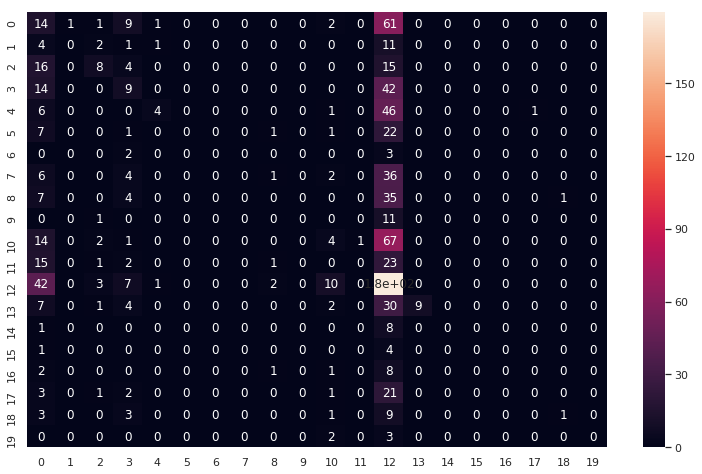

In [182]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, nb_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [184]:
metrics.f1_score(y_test, nb_pred, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.17411363864830445

# Random forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_counts, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [186]:
classifier.predict(count_vect.transform([X_test_list[200]]))

array([11])

In [187]:
rf_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    rf_predictions.append(int(str(classifier.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 
rf_predictions

[12,
 12,
 0,
 12,
 12,
 3,
 3,
 12,
 12,
 10,
 3,
 1,
 12,
 12,
 12,
 12,
 12,
 10,
 10,
 12,
 2,
 12,
 12,
 0,
 12,
 10,
 12,
 0,
 12,
 12,
 3,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 9,
 12,
 10,
 12,
 7,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 3,
 3,
 10,
 12,
 12,
 12,
 12,
 0,
 2,
 1,
 12,
 8,
 2,
 0,
 12,
 3,
 12,
 12,
 12,
 10,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 10,
 12,
 0,
 12,
 12,
 0,
 12,
 12,
 13,
 12,
 12,
 12,
 0,
 17,
 12,
 3,
 12,
 12,
 0,
 12,
 3,
 12,
 8,
 12,
 12,
 12,
 17,
 7,
 12,
 12,
 12,
 3,
 2,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 12,
 12,
 12,
 10,
 0,
 12,
 0,
 12,
 12,
 12,
 12,
 11,
 0,
 3,
 12,
 10,
 12,
 12,
 12,
 12,
 5,
 12,
 12,
 13,
 0,
 12,
 1,
 12,
 12,
 0,
 12,
 8,
 3,
 12,
 12,
 0,
 12,
 8,
 12,
 12,
 12,
 4,
 12,
 12,
 12,
 0,
 12,
 8,
 12,
 3,
 12,
 8,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 0,
 0,
 12,
 11,
 0,
 8,
 4,
 12,
 13,
 11,
 12,
 8,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 10,
 1

In [188]:
predictions['RF predictions']=rf_predictions

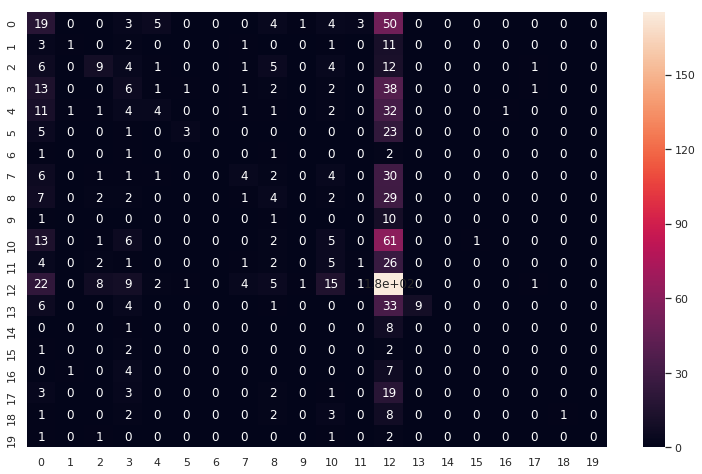

In [189]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, rf_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [190]:

from sklearn import metrics
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.15      0.21      0.18        89
           1       0.33      0.05      0.09        19
           2       0.36      0.21      0.26        43
           3       0.11      0.09      0.10        65
           4       0.29      0.07      0.11        58
           5       0.60      0.09      0.16        32
           6       0.00      0.00      0.00         5
           7       0.29      0.08      0.13        49
           8       0.12      0.09      0.10        47
           9       0.00      0.00      0.00        12
          10       0.10      0.06      0.07        89
          11       0.20      0.02      0.04        42
          12       0.30      0.72      0.43       244
          13       1.00      0.17      0.29        53
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        12
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [191]:
metrics.f1_score(y_test, rf_predictions, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2030465949298437

# kNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_tfidf, y_train)
    pred_i = knn.predict(count_vect.transform(X_test_list))
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

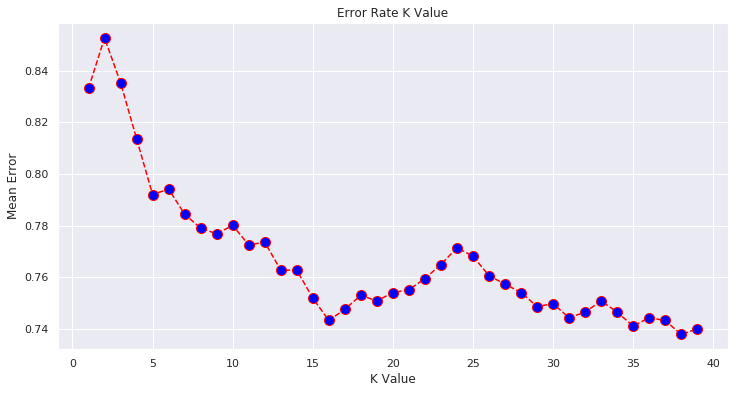

In [193]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [194]:
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(X_train_tfidf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [195]:
knn_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    knn_predictions.append(int(str(model.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 
knn_predictions

[0,
 12,
 12,
 7,
 12,
 3,
 0,
 12,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 2,
 12,
 3,
 0,
 12,
 12,
 12,
 7,
 0,
 12,
 12,
 2,
 12,
 12,
 3,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 10,
 12,
 0,
 0,
 0,
 2,
 12,
 0,
 12,
 12,
 12,
 0,
 10,
 0,
 2,
 12,
 12,
 7,
 12,
 12,
 12,
 12,
 12,
 10,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 10,
 12,
 12,
 12,
 12,
 8,
 0,
 0,
 12,
 12,
 0,
 13,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 13,
 12,
 12,
 12,
 7,
 12,
 0,
 12,
 0,
 12,
 12,
 12,
 12,
 10,
 12,
 12,
 12,
 12,
 3,
 10,
 2,
 0,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 0,
 12,
 12,
 0,
 12,
 10,
 0,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 13,
 12,
 12,
 10,
 8,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 17,
 12,
 12,
 12,
 12,
 12,
 2,
 12,
 10,
 2,
 12,
 12,
 0,
 12,
 12,
 12,
 0,
 0,
 12,
 12,
 12,
 10,
 12,
 12,
 12,
 0,
 3,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 12,
 12,
 12,
 12,
 12,
 10,
 12,
 2,
 12,
 0,
 12,

In [196]:
predictions['kNN predictions']=knn_predictions

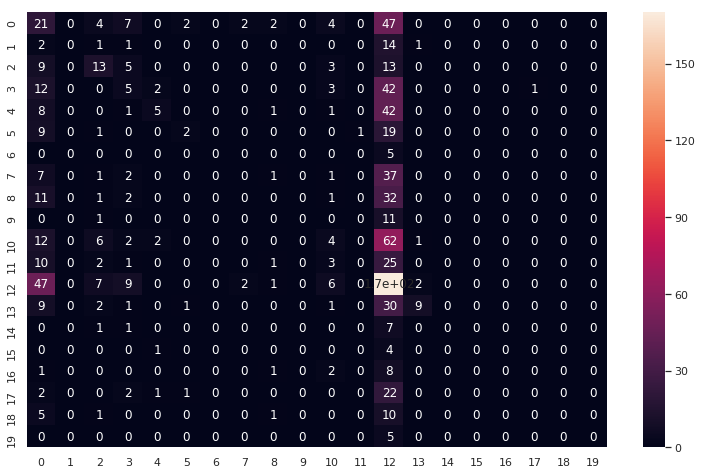

In [197]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, knn_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [198]:
metrics.f1_score(y_test, knn_predictions, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.17795631628530356

In [199]:
from sklearn import metrics
print(metrics.classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.13      0.24      0.17        89
           1       0.00      0.00      0.00        19
           2       0.32      0.30      0.31        43
           3       0.13      0.08      0.10        65
           4       0.45      0.09      0.14        58
           5       0.33      0.06      0.11        32
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        12
          10       0.14      0.04      0.07        89
          11       0.00      0.00      0.00        42
          12       0.28      0.70      0.40       244
          13       0.69      0.17      0.27        53
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        12
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network - MultiLayer perceptron

In [200]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2,1), random_state=1)

In [201]:
mlp.fit(X_train_tfidf, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [202]:
mlp_predictions=[] 
for i in range(len(X_test_list)): 
    mlp_predictions.append(int(str(mlp.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
mlp_predictions

[12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 

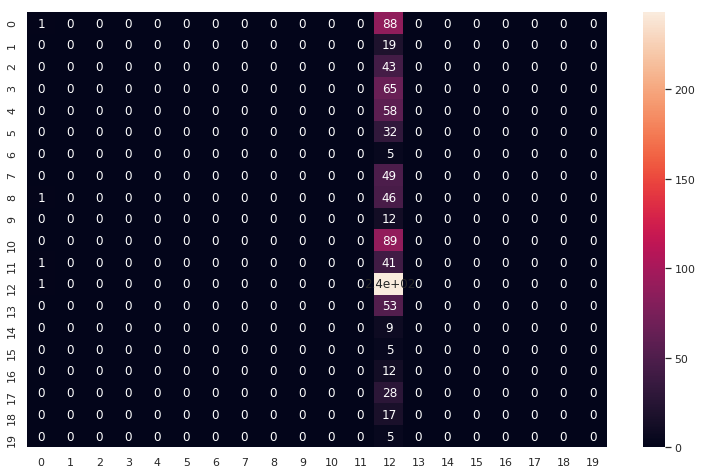

In [203]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, mlp_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [204]:
from sklearn import metrics
print(metrics.classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

           0       0.25      0.01      0.02        89
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        89
          11       0.00      0.00      0.00        42
          12       0.26      1.00      0.42       244
          13       0.00      0.00      0.00        53
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        12
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [205]:
metrics.f1_score(y_test, mlp_predictions, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.11254373238900713